# **BTC vs ETH Visuals**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_btc=pd.read_csv('BTC.csv')
df_eth=pd.read_csv('ETH.csv')

In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               5474 non-null   float64
 1   high               5474 non-null   float64
 2   low                5474 non-null   float64
 3   close              5474 non-null   float64
 4   volume             5474 non-null   float64
 5   marketCap          5474 non-null   float64
 6   CirculatingSupply  5474 non-null   float64
 7   SupplyGrowthRate   5474 non-null   float64
 8   timestamp          5474 non-null   object 
 9   Halving            4 non-null      float64
dtypes: float64(9), object(1)
memory usage: 427.8+ KB


In [ ]:
#take only the year and month and day for the timestamp
df_btc['timestamp']=pd.to_datetime(df_btc['timestamp'], utc = True)
df_eth['timestamp']=pd.to_datetime(df_eth['timestamp'], utc = True)

In [ ]:
df_btc = df_btc.set_index('timestamp')
df_eth = df_eth.set_index('timestamp')

In [ ]:
aggregation_rules = {
    # Price Metrics (last value of the month)
    'open': 'first', # The price on the first day of the month
    'close': 'last', # The price on the last day of the month

    # High/Low (max/min over the month)
    'high': 'max',
    'low': 'min',

    # Volume/Liquidity (sum over the month)
    'volume': 'sum',

    # Market Cap / Supply (last value of the month)
    'marketCap': 'last',
    'CirculatingSupply': 'last',

    # Supply Growth Rate (average over the month)
    'SupplyGrowthRate': 'mean'
}


In [ ]:
# Apply the resampling:
# 'M' specifies resampling to the end of the calendar month
df_btc = df_btc.resample('M').agg(aggregation_rules)
df_eth = df_eth.resample('M').agg(aggregation_rules)

# --- 4. Post-Processing: Calculate Monthly Returns ---
# Monthly returns are an important metric for analysis

# Calculate Simple Monthly Return: (Closing Price End of Month / Closing Price Start of Month) - 1
# To get the closing price at the start of the month, we use the 'close' price from the previous row (Shift)
df_btc['monthly_return'] = df_btc['close'].pct_change()
df_eth['monthly_return'] = df_eth['close'].pct_change()

/tmp/ipython-input-3463390376.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc = df_btc.resample('M').agg(aggregation_rules)
/tmp/ipython-input-3463390376.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_eth = df_eth.resample('M').agg(aggregation_rules)


In [ ]:
df_eth.tail()

,open,close,high,low,volume,marketCap,CirculatingSupply,SupplyGrowthRate,monthly_return
timestamp,,,,,,,,,
2025-03-31 00:00:00+00:00,2237.942107,1823.480005,2548.811845,1760.941791,524493831617,2.200000e+11,120662688.6,0.002138,-0.185184
2025-04-30 00:00:00+00:00,1823.562375,1793.775362,1951.180305,1386.799313,512390406805,2.170000e+11,120748118.5,0.002361,-0.016290
2025-05-31 00:00:00+00:00,1794.041006,2529.087378,2784.752467,1753.315433,736439227936,3.050000e+11,120724575.5,-0.000628,0.409924
2025-06-30 00:00:00+00:00,2529.096604,2486.464333,2877.629290,2116.681481,597782871981,3.000000e+11,120715988.6,-0.000234,-0.016853
2025-07-31 00:00:00+00:00,2486.428479,2615.505759,2635.192120,2378.393527,134371836020,3.160000e+11,120716614.3,0.000066,0.051898


In [ ]:
#reset timestamp as column for visualization
df_btc.reset_index(inplace=True)
df_eth.reset_index(inplace=True)

In [ ]:
df_halving=pd.read_csv('BTC.csv')
# where halving == 1
df_halving= df_halving.query('Halving == 1')
df_halving = pd.to_datetime(df_halving['timestamp'], utc = True)

In [ ]:
eth_col="black"
btc_col="#F7941D"

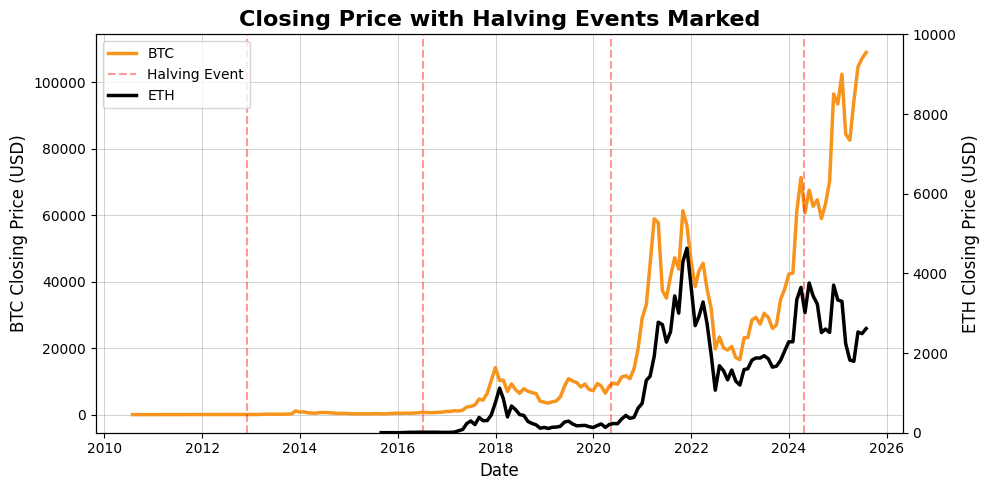

In [ ]:
import matplotlib.pyplot as plt

# 1. Initialize the Figure and the first Axes (ax1)
# fig is the container, ax1 is the first plot area (for BTC)
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Plot BTC on ax1 (Left Y-axis) ---
# Use btc_col for the line and the label color
ax1.plot(df_btc['timestamp'], df_btc['close'], color=btc_col, linewidth=2.5, label='BTC')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('BTC Closing Price (USD)', color="black", fontsize=12)
ax1.tick_params(axis='y', labelcolor="black") # Match tick color to line color

# 2. Create the twin Axes (ax2) that shares the x-axis
ax2 = ax1.twinx()

# --- Plot ETH on ax2 (Right Y-axis) ---
# Use eth_col for the line and the label color
ax2.plot(df_eth['timestamp'], df_eth['close'], color=eth_col, linewidth=2.5, label='ETH')
ax2.set_ylabel('ETH Closing Price (USD)', color=eth_col, fontsize=12)
ax2.tick_params(axis='y', labelcolor=eth_col) # Match tick color to line color
ax2.set_ylim(0, 10000)
# --- Add vertical lines where halving = 1 ---
halving_label_added = False # Use a flag to ensure the legend only shows 'Halving Event' once
for date in df_halving:
    ax1.axvline(
        x=date,
        color='RED',
        linestyle='--',
        linewidth=1.5,
        alpha=0.4,
        # Label only the first line for the legend
        label='Halving Event' if not halving_label_added else ""
    )
    halving_label_added = True

# --- Set Title, Grid, and Combined Legend ---
plt.title('Closing Price with Halving Events Marked', fontsize=16, fontweight='bold')
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.5) # Grid on ax1

# Combine legend handles and labels from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_lines = lines1 + lines2
all_labels = labels1 + labels2

# Place the combined legend (e.g., 'upper left')
ax1.legend(all_lines, all_labels, loc='upper left')

plt.tight_layout()
plt.show()

# **📈 Price and Halving Event Interpretation**
The graph shows that Bitcoin (BTC) and Ethereum (ETH) prices are highly correlated, moving together throughout major market cycles. Bitcoin's Halving Events (vertical dashed lines) historically precede massive bull runs for both assets, clearly marking the start of major growth periods, such as those leading into 2018 and 2021. While BTC acts as the market leader with its price on the left axis, the subsequent surge in ETH (on the right axis) confirms that the Halving is a powerful catalyst for the entire cryptocurrency ecosystem.

In [ ]:
#calculate ethereum price in bitcoin
df_eth['price_in_btc']=df_eth['close']/df_btc['close']

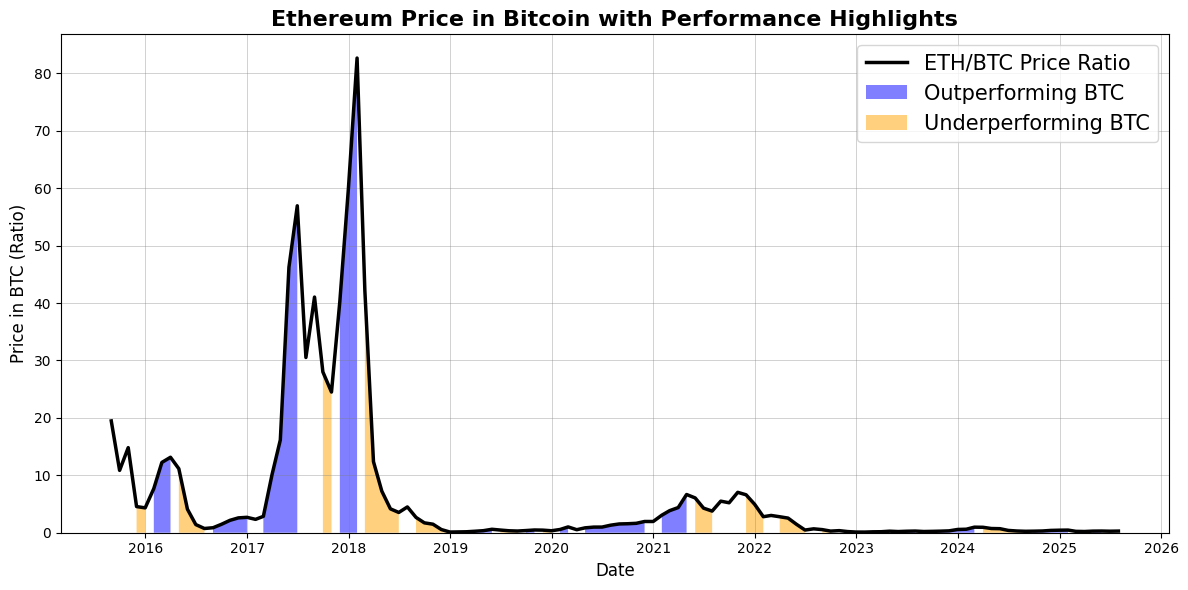

In [ ]:
df_eth['change'] = df_eth['price_in_btc'].diff()

plt.figure(figsize=(12, 6))

# Define colors
appreciation_col = "blue" #'#34D399' # Green for appreciation (outperforming)
depreciation_col = "orange"#'#EF4444' # Red for underperformance

# Plot the main price line
plt.plot(df_eth['timestamp'], df_eth['price_in_btc'], color=eth_col, linewidth=2.5, label='ETH/BTC Price Ratio')

# Define the condition: Price increased from the previous day
is_appreciating = df_eth['change'] > 0
is_depreciating = df_eth['change'] <= 0

# 1. Fill for APPRECIATION (Green) - where ETH is outperforming BTC
plt.fill_between(
    df_eth['timestamp'],
    df_eth['price_in_btc'],  # y1: The price line
    y2=0, # y2: Fill down to the x-axis (0 ratio)
    where=is_appreciating,  # The condition to apply the fill
    facecolor=appreciation_col,
    alpha=0.5,
    label='Outperforming BTC'
)

# 2. Fill for DEPRECIATION/UNDERPERFORMANCE (Red)
plt.fill_between(
    df_eth['timestamp'],
    df_eth['price_in_btc'],
    y2=0,
    where=is_depreciating,
    facecolor=depreciation_col,
    alpha=0.5,
    label='Underperforming BTC'
)

# Customize the plot
plt.title('Ethereum Price in Bitcoin with Performance Highlights', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in BTC (Ratio)', fontsize=12)
plt.ylim(bottom=0) # Ensure y-axis starts at 0
plt.legend(loc='upper right', fontsize=15)
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.tight_layout()
plt.show()


# **⚖️ Ethereum's Performance Relative to Bitcoin**
The chart illustrates the ETH/BTC Price Ratio, which measures Ethereum's value in terms of Bitcoin, highlighting periods where ETH outperforms (blue shading) or underperforms (orange shading) BTC. The data shows that the period of most extreme ETH outperformance and volatility was during the 2017-2018 bull market, where the ratio spiked dramatically to its highest level. In the subsequent 2021 bull run, while ETH still experienced periods of significant outperformance, the magnitude of the ratio's peak was much lower and generally sustained a narrower range compared to 2018. This suggests that while ETH maintains an innovative role, its trading relationship with BTC has become more stable over time.

In [ ]:
#collect df_btc volume starting from 2015-08-31
df_btc15 = df_btc.loc[df_btc['timestamp'] >= '2015-08-31']
df_btc15.reset_index(inplace=True)
df_btc15.drop(columns='index', inplace=True)

/tmp/ipython-input-482580114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc15.drop(columns='index', inplace=True)


In [ ]:
df = {
    'Date': df_eth['timestamp'],
    'Total Volume' : df_eth['volume']+df_btc15['volume'],
    'ETH Share': df_eth['volume']/(df_eth['volume']+df_btc15['volume'])*100,
    'BTC Share': df_btc15['volume']/(df_eth['volume']+df_btc15['volume'])*100

}
df=pd.DataFrame(df)

In [ ]:
df_event=pd.read_csv('majorevent.csv')
df_event['Date']=pd.to_datetime(df_event['Date'])

In [ ]:
df_event[['Date','Event']]

,Date,Event
0,2015-09-01,Ethereum Genesis Block
1,2016-07-01,Bitcoin Halving (2nd)
2,2016-10-01,The DAO Hack & ETH Hard Fork
3,2017-12-01,CME Launches BTC Futures
4,2018-08-01,Start of Crypto Winter
5,2020-03-01,COVID-19 Crash
6,2020-10-01,Bitcoin Halving (3rd)
7,2021-05-01,China Bans Crypto Mining
8,2021-11-01,BTC & ETH All-Time Highs
9,2022-05-01,Terra (LUNA) Ecosystem Collapse


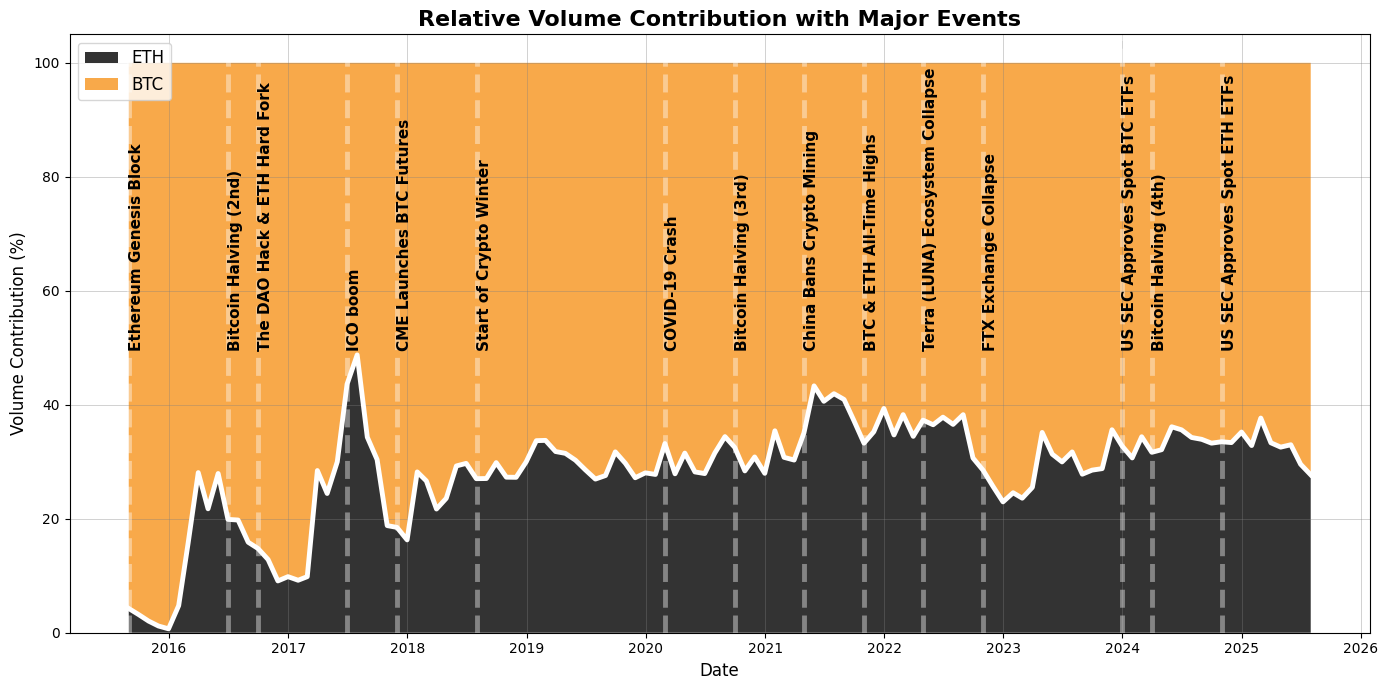

In [ ]:
#stacked area chart
plt.figure(figsize=(14, 7))
plt.stackplot(df_eth['timestamp'], df['ETH Share'], df['BTC Share'], labels=['ETH', 'BTC'], colors=[eth_col, btc_col],alpha=0.8)
plt.plot(df_eth['timestamp'], df['ETH Share'], color = "white", linewidth=3.5)
for event in df_event.values:
  plt.axvline(
        x=event[0],              # The X-axis position (the date)
        color='white',         # Color of the line
        linestyle='--',      # Dashed line style
        linewidth=3.5,       # Thickness of the line
        alpha=0.4            # Transparency
    )
  plt.text(x=event[0], y=50, s=event[1], rotation=90, fontsize=11,color="black",fontweight='bold')
plt.title('Relative Volume Contribution with Major Events', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume Contribution (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

# **📊 Volume Contribution and Major Events**
The chart shows that Bitcoin (BTC) consistently dominates the overall volume contribution to the market, taking the majority share (orange area) while Ethereum (ETH) holds a significant but smaller portion (dark area). Periods of major market events cause noticeable shifts in this balance. Specifically, the ICO Boom in 2017 and the BTC & ETH All Time Highs in late 2021 are marked by Ethereum's volume contribution surging significantly, peaking above 40% of the total, as frenzied activity and innovation on the Ethereum network drove higher trading. Conversely, during market crashes, such as the Start of Crypto Winter (early 2018) and the Terra/FTX collapses (2022), Ethereum's relative volume share typically declines, suggesting investors prioritize trading or exiting through the Bitcoin market during high-panic events.

# **💡 Overall Interpretation: BTC vs ETH Market Dynamics**
The cryptocurrency market is fundamentally led by Bitcoin (BTC), whose price movements dictate the overall trend for the highly correlated Ethereum (ETH). BTC acts as the primary vehicle for broad market sentiment, with its price peaks strongly preceded by massive spikes in public interest, especially in 2021. BTC Halving Events consistently mark the start of major bull cycles for both assets.

However, the charts show that ETH is the primary source of technological exuberance and risk appetite. ETH's price experienced its most extreme outperformance relative to BTC (ETH/BTC ratio) during the 2017 ICO Boom, a period when its volume contribution also surged. While BTC maintains the majority of trading volume (the orange area), ETH's volume share (the dark area) spikes significantly during periods of major innovation or adoption, such as the late 2021 All Time Highs. Therefore, while BTC is the sentiment barometer that drives the cycle, ETH is the utility asset that captures increased capital and activity when the market embraces innovation.